### State of (open-source) Deep Learning, in Python:
- 2 most popular frameworks:
    - Tensorflow (Google) ~2015
        - Keras (Google) ~2015
    - PyTorch (Facebook) ~2016

As of 2020, Keras library is now directly part of TensorFlow
- i.e. ``import tensorflow.keras``

## 1. Install Tensorflow:

1. Create new environment:
   -  `conda create -n dl pip python=3.7`
2. Switch to that environment:
   - `conda activate dl`
3. Installed Tensorflow within that environment:
   - `conda install -c conda-forge tensorflow`
4. Install Jupyter Lab within that environment:
   - `conda install -c anaconda jupyter`
5. Launch Jupyter from within that environment.
   - `jupyter notebook`

In [1]:
# Import tensorflow.keras
import tensorflow.keras

In [2]:
# Check if you are in the right environment
!which jupyter

/home/mmuratardag/anaconda3/envs/tf/bin/jupyter


## 2. Other Options:

Other options:

1. install tensorflow via `conda install -c conda-forge tensorflow`


2. Use Docker - https://www.tensorflow.org/install/docker
    - e.g. `docker run -it -p 8888:8888 tensorflow/tensorflow:nightly-jupyter`
   
   
3. Use Cloud-Based Alternatives:
   - Google Colab: https://colab.research.google.com/
       - Run notebooks right in the cloud. 
       - Comes with GPU Support.
   - PaperSpace Gradient: https://gradient.paperspace.com/
   

---

### Making Neural Networks in Tensorflow / Keras

In [3]:
# Install some other libraries we will need
# !pip install --no-input scikit-learn
# !pip install --no-input matplotlib
# !pip install --no-input pandas

In [4]:
# Import the practice dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [5]:
# Inspect the shape of X
X.shape

(500, 2)

In [6]:
# Inspect the shape of y
y.shape

(500,)

In [7]:
import seaborn as sns

<AxesSubplot:>

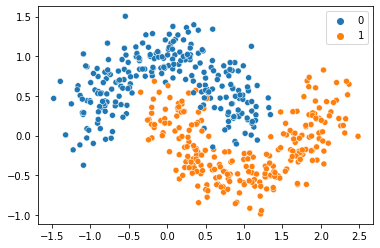

In [8]:
sns.scatterplot(x=X[:,0], y= X[:,1], hue = y)

**Making a Feed-Forward Network**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Understand the input shape of X
X[0].shape

(2,)

In [11]:
# Define the model - instantiate and object of the class Sequential
m = Sequential([
    Dense(units = 2, input_shape = (2,), activation = 'sigmoid'),
    Dense(units = 1, activation = 'sigmoid')
])

In [12]:
# Look at the summary of the model
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**At this point, in sklearn, we would jump straight to m.fit()**
- But in Keras, there's one extra step:
    - compilation: compiling the python code you wrote into lower-level c++ code for better performance.

In [13]:
m.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
# optimizer: 
# loss: 
# metrics:

**Now we can train**: 🚃
- we can save our fitting history to our variable

In [14]:
history = m.fit(X, y, batch_size = 32, epochs = 100, validation_split = 0.2, use_multiprocessing=True) # verbose = 0 1 2
# batch_size:
# epochs:
# validation_split:

Epoch 1/100
13/13 [==============================] - 3s 92ms/step - loss: 0.7852 - accuracy: 0.4841 - val_loss: 0.7910 - val_accuracy: 0.4500
Epoch 2/100
13/13 [==============================] - 0s 37ms/step - loss: 0.7733 - accuracy: 0.4908 - val_loss: 0.7850 - val_accuracy: 0.4500
Epoch 3/100
13/13 [==============================] - 0s 36ms/step - loss: 0.7684 - accuracy: 0.4857 - val_loss: 0.7789 - val_accuracy: 0.4500
Epoch 4/100
13/13 [==============================] - 0s 30ms/step - loss: 0.7588 - accuracy: 0.4983 - val_loss: 0.7732 - val_accuracy: 0.4500
Epoch 5/100
13/13 [==============================] - 0s 23ms/step - loss: 0.7576 - accuracy: 0.4904 - val_loss: 0.7680 - val_accuracy: 0.4500
Epoch 6/100
13/13 [==============================] - 0s 35ms/step - loss: 0.7443 - accuracy: 0.5140 - val_loss: 0.7625 - val_accuracy: 0.4500
Epoch 7/100
13/13 [==============================] - 0s 37ms/step - loss: 0.7459 - accuracy: 0.5016 - val_loss: 0.7579 - val_accuracy: 0.4500
Epoch 

**And plot the results!**

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(12,6)

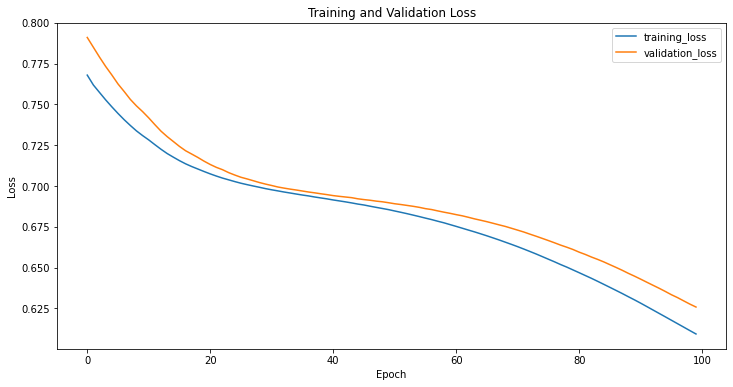

In [16]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

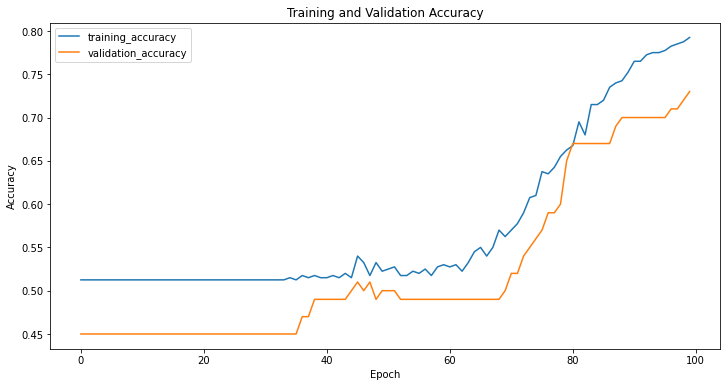

In [17]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Evaluate the model
m.evaluate(X, y)

16/16 [==============================] - 0s 13ms/step - loss: 0.6116 - accuracy: 0.7820


[0.6115626096725464, 0.7820000052452087]

In [19]:
# Make predictions
yhat = m.predict(X)

In [20]:
# Inspect the weights of the Neural Network
m.get_weights()

[array([[-0.74955785, -1.0620196 ],
        [ 0.74852824,  0.44527024]], dtype=float32),
 array([-0.16429175, -0.08837825], dtype=float32),
 array([[-0.54615784],
        [-0.7719882 ]], dtype=float32),
 array([0.31868973], dtype=float32)]

---

### Where to Begin Practicing: MNIST

In [21]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

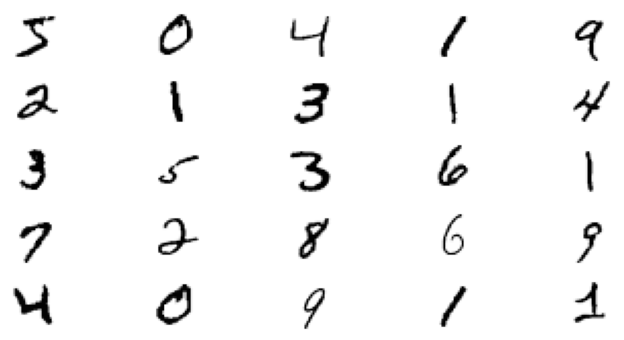

In [22]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [23]:
# Inspect the shape of X
X_train.shape

(60000, 28, 28)

In [24]:
# Inspect the shape of y
y_train.shape

(60000,)

In [25]:
# Look at the shape of a single image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
# We want the input image to be a flat array.
# Flatten the input
#X_train = ...
X_train.shape

(60000, 28, 28)

In [27]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [28]:
X_train = X_train.reshape(60000, -1)
X_train.shape

(60000, 784)

In [29]:
# Understand what it means to flatten the images
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's build a model

There will be two intricacies you have to take care of.

1. Defining the right input shape
2. Dealing with the shape of y

### Mini-Projects this Week:
- Neural Network From Scratch
- Classifying Handwritten Digits (MNIST)
    - Fashion MNIST: https://github.com/zalandoresearch/fashion-mnist
- Transfer Learning for Image Recognition
    - Up to you!